In [1]:
import numpy as np
import scipy.optimize as sco
from matplotlib import pyplot as plt

## Fonction test

In [2]:
def funRosen(x):
    dim = x.shape[0]
    val = 100.0*(x[1:dim]-x[0:dim-1]**2)**2 + (1-x[0:dim-1])**2
    return val.reshape(x[0].shape)


## Tracé fonction test

In [3]:
bounds = ((-6,10),
          (-6,10))
nbPoints = 100
spaceX = np.linspace(bounds[0][0], bounds[0][1], nbPoints)
spaceY = np.linspace(bounds[1][0], bounds[1][1], nbPoints)
X, Y = np.meshgrid(spaceX, spaceY)
Z = funRosen(np.array([X,Y]))

<Figure size 640x480 with 0 Axes>

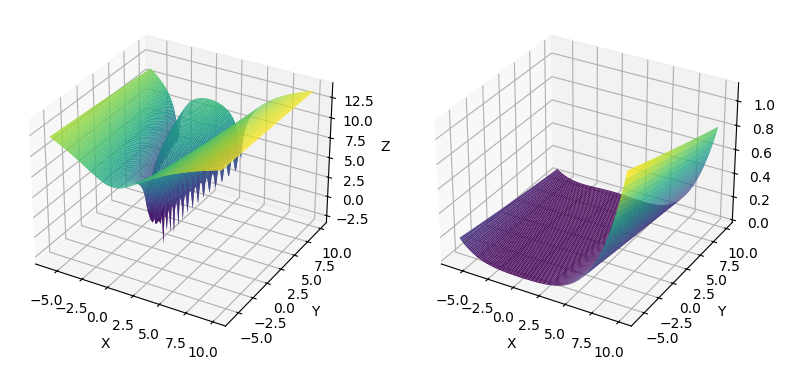

In [4]:

fig = plt.figure()
# Set up plot
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, np.log(Z), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#
axb = fig.add_subplot(1, 2, 2, projection='3d')
axb.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
axb.set_xlabel('X')
axb.set_ylabel('Y')
axb.set_zlabel('Z')
plt.show()

## Optimisation

In [5]:
result = sco.minimize(funRosen, np.array([0,0]), method='Nelder-Mead')
print('>> Jeux de paramètres optimaux : {}'.format(result.x))
print('>> Valeur minimum de la fonction : {}'.format(result.fun))
print('>> Nombre d''appels à la fonction : {}'.format(result.nfev))
print('>> Nombre d''itérations de l''algo : {}'.format(result.nit))

>> Jeux de paramètres optimaux : [1.00000439 1.00001064]
>> Valeur minimum de la fonction : 3.6861769151759075e-10
>> Nombre dappels à la fonction : 146
>> Nombre ditérations de lalgo : 79


In [6]:
result = sco.minimize(funRosen, np.array([0,0]), method='L-BFGS-B', bounds=bounds)
print('>> Jeux de paramètres optimaux : {}'.format(result.x))
print('>> Valeur minimum de la fonction : {}'.format(result.fun))
print('>> Nombre d''appels à la fonction : {}'.format(result.nfev))
print('>> Nombre d''itérations de l''algo : {}'.format(result.nit))

>> Jeux de paramètres optimaux : [0.99999728 0.99999455]
>> Valeur minimum de la fonction : 7.420150405040984e-12
>> Nombre dappels à la fonction : 84
>> Nombre ditérations de lalgo : 21


## (Mauvais) réglage de la tolérance de convergence

In [7]:
result = sco.minimize(funRosen, 
                      np.array([0,0]), 
                      tol = 1e0, #<<<<<<<<<<
                      method='L-BFGS-B', 
                      bounds=bounds)
print('>> Jeux de paramètres optimaux : {}'.format(result.x))
print('>> Valeur minimum de la fonction : {}'.format(result.fun))
print('>> Nombre d''appels à la fonction : {}'.format(result.nfev))
print('>> Nombre d''itérations de l''algo : {}'.format(result.nit))

>> Jeux de paramètres optimaux : [ 1.22321761e-01 -6.11119961e-08]
>> Valeur minimum de la fonction : 0.7927072533630406
>> Nombre dappels à la fonction : 12
>> Nombre ditérations de lalgo : 1


## Etude de convergence en fonction de la tolerance

In [8]:
tolVal = np.logspace(0, -10, 100)
valFun = list()
for t in tolVal:
    result = sco.minimize(funRosen, 
                        np.array([0,0]), 
                        tol = t, #<<<<<<<<<<
                        method='L-BFGS-B', 
                        bounds=bounds)
    valFun.append(result.fun)

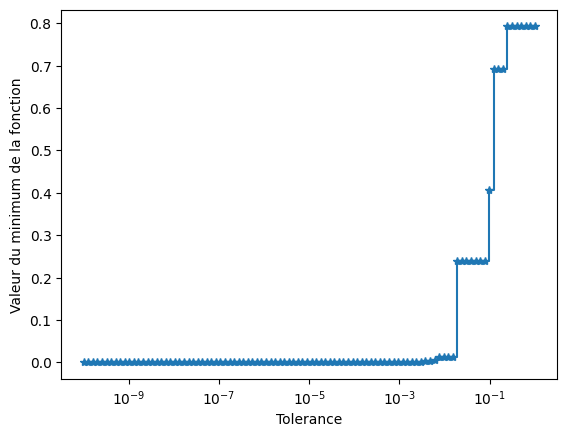

In [9]:
plt.figure()
plt.step(tolVal, valFun,'*-')
plt.xlabel('Tolerance')
plt.ylabel('Valeur du minimum de la fonction')
plt.xscale('log')
plt.show()

## Extraction des données durant les itérations (avec L-BFGS)

In [10]:
## generation d'une classe pour sotcker les résultats
class storageClass:
    def __init__(self):
        self.x = []
        self.fun = []
        self.it = 0
    def load(self,intermediate_result: sco.OptimizeResult):
        self.it +=1
        self.x.append(intermediate_result.x.copy())
        self.fun.append(intermediate_result.fun)
        print("Iteration {}: x = {}, fun = {}".format(self.it, intermediate_result.x, intermediate_result.fun))

In [11]:
## initialisation de la classe
storage = storageClass()
## execution optimisation
result = sco.minimize(funRosen, 
                      x0=np.array([10,-6]), ## << à bien vérifier en fonction de l'algorithme
                      tol = 1e-10,
                      method='L-BFGS-B', 
                      callback=storage.load,
                      bounds=bounds
                      )


Iteration 1: x = [-6. 10.], fun = 67649.0
Iteration 2: x = [-4.58685355 10.        ], fun = 12217.66285106303
Iteration 3: x = [-3.90740593 10.        ], fun = 2799.0765595568746
Iteration 4: x = [-3.44152664 10.        ], fun = 359.79971962450406
Iteration 5: x = [-3.23315505 10.        ], fun = 38.46692428545332
Iteration 6: x = [-3.16969937 10.        ], fun = 17.607237286008445
Iteration 7: x = [-3.16151732 10.        ], fun = 17.320538309953072
Iteration 8: x = [-3.16118408  9.99965838], fun = 17.31977416468124
Iteration 9: x = [-3.16084899  9.99882148], fun = 17.31883464592462
Iteration 10: x = [-3.15974471  9.99486649], fun = 17.31531318486366
Iteration 11: x = [-3.15740898  9.98442181], fun = 17.30712411910569
Iteration 12: x = [-3.15136733  9.9536649 ], fun = 17.284695853182942
Iteration 13: x = [-3.13626955  9.87040764], fun = 17.22583298907503
Iteration 14: x = [-3.09253513  9.61801695], fun = 17.043078716183516
Iteration 15: x = [-2.55941621  6.48452954], fun = 13.106124326

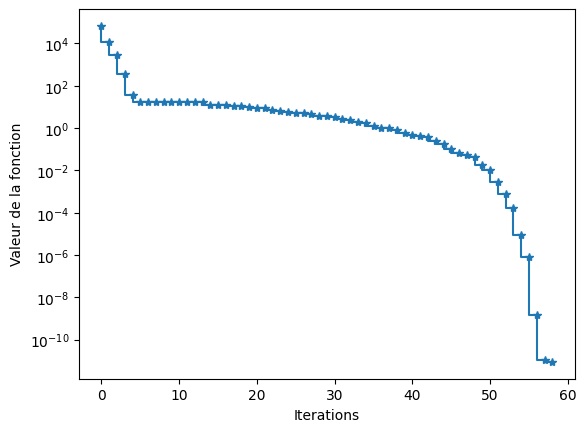

In [12]:
# tracés de la valeur de la fonction au fur et à mesure des itérations
plt.figure()
plt.step(np.arange(len(storage.fun)), storage.fun,'*-')
plt.xlabel('Iterations')
plt.ylabel('Valeur de la fonction')
plt.yscale('log')
plt.show()


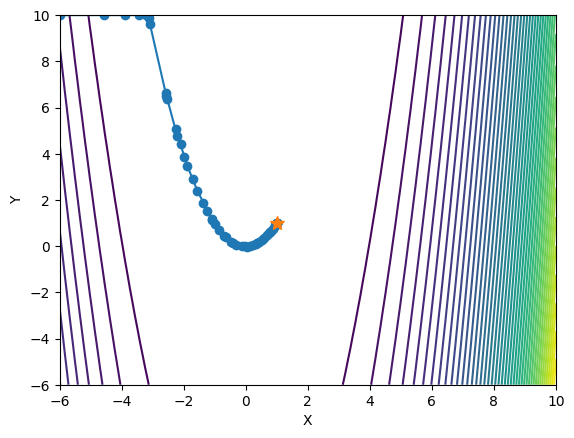

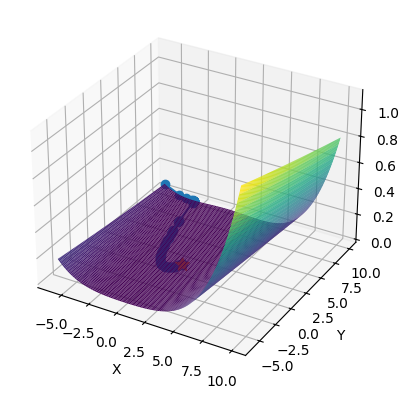

In [13]:
# valeur de X au fur et à mesure des itérations
Xiter = np.array(storage.x)
Ziter = np.array(storage.fun)
# # tracés des points au fur et à mesure des itérations
plt.figure()
plt.contour(X, Y, Z, 50)  ## << np.log(Z) pour mieux afficher la vallée
plt.plot(Xiter[:,0], Xiter[:,1],'o-')
plt.plot(Xiter[-1,0], Xiter[-1,1],'*', markersize=10)
plt.xlabel('X')
plt.ylabel('Y')
# plt.xscale('log')
plt.show()
# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.plot(Xiter[:,0], Xiter[:,1],Ziter,'o-')
ax.plot(Xiter[-1,0], Xiter[-1,1],Ziter[-1],'*', markersize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Extraction des données durant les itérations (avec Nelder-Mead)

In [14]:
## generation d'une classe pour sotcker les résultats
class storageClass:
    def __init__(self):
        self.x = []
        self.fun = []
        self.it = 0
    def load(self,intermediate_result: sco.OptimizeResult):
        self.it +=1
        self.x.append(intermediate_result.x.copy())
        self.fun.append(intermediate_result.fun)
        print("Iteration {}: x = {}, fun = {}".format(self.it, intermediate_result.x, intermediate_result.fun))

In [15]:
## initialisation de la classe
storage = storageClass()
## execution optimisation
result = sco.minimize(funRosen, 
                      x0=np.array([-6,10]), ## << à bien vérifier en fonction de l'algorithme
                      tol = 1e-10,
                      method='Nelder-Mead', 
                      callback=storage.load
                      )


Iteration 1: x = [-5.4  10.75], fun = 33933.769999999946
Iteration 2: x = [-5.1   11.875], fun = 20017.032499999936
Iteration 3: x = [-3.75   12.9375], fun = 149.12499999999116
Iteration 4: x = [-3.75   12.9375], fun = 149.12499999999116
Iteration 5: x = [-3.75   12.9375], fun = 149.12499999999116
Iteration 6: x = [-3.75   12.9375], fun = 149.12499999999116
Iteration 7: x = [-3.7875   13.296875], fun = 132.80951416014773
Iteration 8: x = [-3.609375   13.58984375], fun = 52.859503030781525
Iteration 9: x = [-3.609375   13.58984375], fun = 52.859503030781525
Iteration 10: x = [-3.7078125  13.53320312], fun = 26.771837034819793
Iteration 11: x = [-3.7078125  13.53320312], fun = 26.771837034819793
Iteration 12: x = [-3.64921875 13.47167969], fun = 24.01408463958771
Iteration 13: x = [-3.68261719 13.66674805], fun = 23.03105698529257
Iteration 14: x = [-3.68686523 13.5512085 ], fun = 22.141151952200005
Iteration 15: x = [-3.68686523 13.5512085 ], fun = 22.141151952200005
Iteration 16: x = [

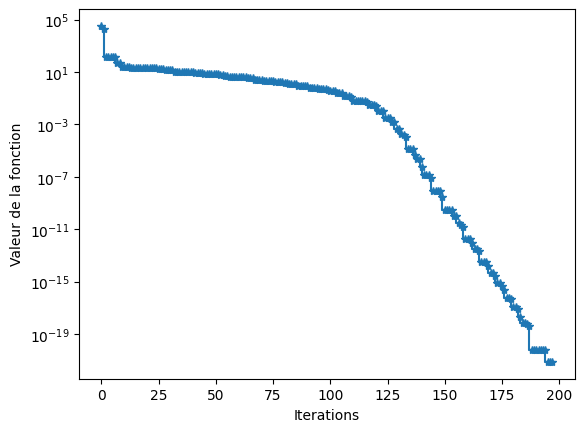

In [16]:
# tracés de la valeur de la fonction au fur et à mesure des itérations
plt.figure()
plt.step(np.arange(len(storage.fun)), storage.fun,'*-')
plt.xlabel('Iterations')
plt.ylabel('Valeur de la fonction')
plt.yscale('log')
plt.show()


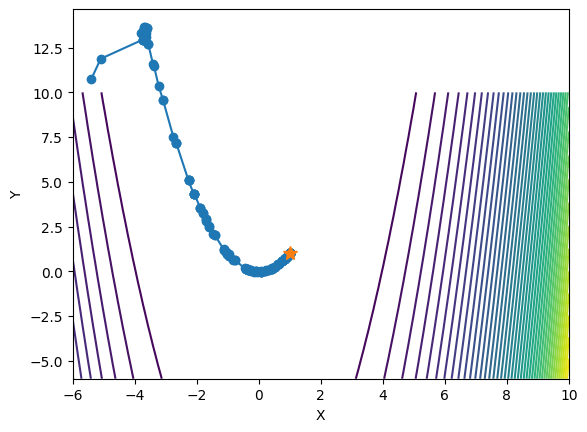

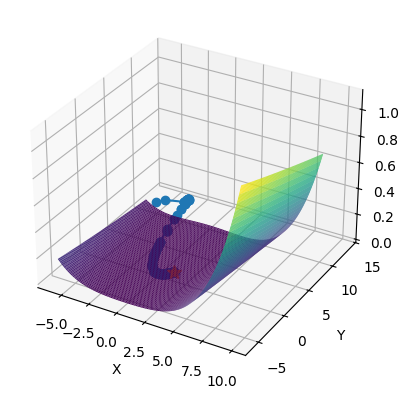

In [17]:
# valeur de X au fur et à mesure des itérations
Xiter = np.array(storage.x)
Ziter = np.array(storage.fun)
# # tracés des points au fur et à mesure des itérations
plt.figure()
plt.contour(X, Y, Z, 50)  ## << np.log(Z) pour mieux afficher la vallée
plt.plot(Xiter[:,0], Xiter[:,1],'o-')
plt.plot(Xiter[-1,0], Xiter[-1,1],'*', markersize=10)
plt.xlabel('X')
plt.ylabel('Y')
# plt.xscale('log')
plt.show()
# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.plot(Xiter[:,0], Xiter[:,1],Ziter,'o-')
ax.plot(Xiter[-1,0], Xiter[-1,1],Ziter[-1],'*', markersize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()